In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import lxml.html as lh

In [2]:
sueldos  = pd.read_excel('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Trabajos/tabulador_pe2019.xls',header=9)

In [3]:
sueldos.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


#### ¿Cuál es promedio de las contribuciones del sueldo de un trabajador en esta dependencia?

In [4]:
sueldos.describe()['SUELDO MENSUAL BRUTO']['mean']

49467.3759351061

In [5]:
sueldos.describe()['SUELDO MENSUAL NETO']['mean']

35829.35357437968

#### ¿Media y  Moda de las contribuciones del sueldo de un trabajador ? Rango interquartil de la distribución. 

In [6]:
sueldos['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

In [7]:
sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%':'75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

#### ¿Cuál es la dispersión de sueldos?

In [8]:
mediana_SN = sueldos['SUELDO MENSUAL NETO'].median()
print(mediana_SN)

22078.22528193275


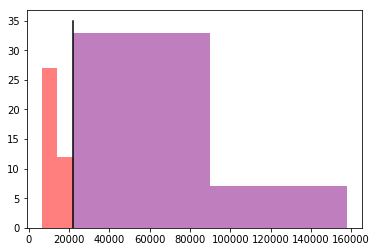

In [9]:
plt.hist(sueldos[sueldos['SUELDO MENSUAL NETO']< mediana_SN]['SUELDO MENSUAL NETO'],bins = 2,color='red',alpha = 0.5)
plt.hist(sueldos[sueldos['SUELDO MENSUAL NETO']>= mediana_SN]['SUELDO MENSUAL NETO'],bins = 2,color='purple',alpha = 0.5)
plt.plot(np.ones(100)*mediana_SN,np.linspace(0,35,100),'k');

#### ¿Cuál es el sueldo base máximo? 

In [10]:
sueldos.describe()['SUELDO BASE'].loc['max']

59804.3279302758

#### ¿Cuál es el sueldo base mínimo?

In [11]:
sueldos.describe()['SUELDO BASE'].loc['min']

3080.4

#### Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos

In [12]:
sueldos['%SUELDO NETO'] = 100*sueldos['IMPTO MENSUAL']/np.sum(sueldos['IMPTO MENSUAL'])

In [13]:
sueldos.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO,%SUELDO NETO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año,7.944592
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año,6.488325
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año,5.023471
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año,5.023471
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año,4.336242
